The time it takes the ball to hit the ground after reaching its maximum height is: 0.10 seconds

Is the time to hit the ground from maximum height larger than the time it takes to reach maximum height?
Yes, the time to hit the ground takes more time than reaching the maximum height.


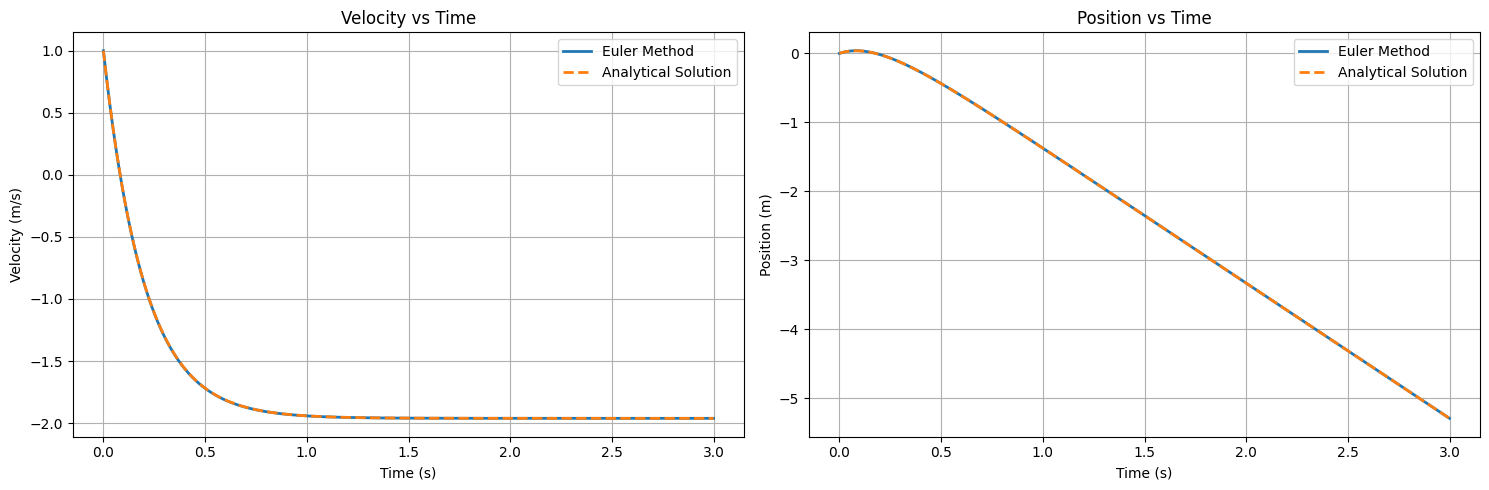

In [2]:
# Variables and constants
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 0.1 # mass in kg
b = 0.5 # damping coefficient in kg/s
g = 9.81 # acceleration due to gravity in m/s^2
y0 = 0 # initial position
v0 = 1 # initial velocity m/s - Belongs to part D

# Forces
gravity = -m * g 
drag_force = -b * v0

# from Part B
def velocity(t):
    return (v0+m*g/b) * np.exp(-b/m * t) - (m*g/b)

# from Part C - time to get to max height
def time_to_max_height():
    return -m/b * np.log((m*g) / (m*g + b*v0))

dt = 0.001  # time step in seconds

# Part D - Euler's method for velocity
def euler_method(time_array):
    v = np.zeros_like(time_array)
    v[0] = v0  # initial velocity
    
    for i in range(1, len(time_array)):
        current_drag = -b * v[i-1]  # drag force updates with velocity
        v[i] = v[i-1] + (gravity + current_drag) * dt / m
    
    return v

# Total time for simulation
simulation_time = float(input("Enter the total time for the simulation (in seconds): "))

time_arr = np.arange(0, simulation_time, dt)

v_euler_method_arr = euler_method(time_arr)
v_analytical_arr = velocity(time_arr)

# Part F - Find y(t) numerically using Euler's method, find the time it takes the ball to hit the ground
def euler_method_position(total_time):
    t = np.arange(0, total_time, dt)
    y = np.zeros_like(t)
    y[0] = y0
    
    for i in range(1, len(t)):
        y[i] = y[i-1] + v_euler_method_arr[i-1] * dt
    return y

def position_analytical(t):
    return (m/b) * (v0 + m*g/b) * (1 - np.exp(-b*t/m)) - (m*g*t/b)

y_euler_method_arr = euler_method_position(simulation_time)
y_analytical_arr = position_analytical(time_arr)

max_height_time = time_to_max_height()

def zero_cross(signal):
    """
    Finds the indices in a 1D array where the signal crosses zero.
    A zero-crossing occurs when consecutive elements have opposite signs.

    Parameters:
    ----------
    signal : numpy.ndarray
        A 1D numpy array containing sampled values of a signal or function.

    Returns:
    -------
    numpy.ndarray
        An array of indices where a sign change (zero-crossing) occurs.
        Each index i returned corresponds to a sign change between signal[i] and signal[i+1].

    Example:
    -------
    >>> signal = np.array([1, -1, -2, 3, -4])
    >>> zero_cross(signal)
    array([0, 2, 3])  # zero-crossings between (1, -1), (-2, 3), and (3, -4)
    """

    # Step 1: Get the sign of each element in the signal.
    # Positive values → 1, Negative → -1, Zero → 0
    sign_array = np.sign(signal)

    # Step 2: Compute the difference between consecutive signs.
    # If two adjacent signs differ, there is a sign change (i.e., zero crossing).
    sign_diff = np.diff(sign_array)

    # Step 3: The indices where sign_diff is non-zero correspond to sign changes.
    # np.nonzero returns a tuple, we extract the first element to get the indices.
    zero_crossing_indices = np.nonzero(sign_diff)[0]

    return zero_crossing_indices

# Find the time in which the ball hits the ground using zero crossing
zero_crossing_indices = zero_cross(y_euler_method_arr)  # Get all zero crossings
if len(zero_crossing_indices) > 1:  # Check if we have at least 2 zero crossings
    time_to_hit_ground = time_arr[zero_crossing_indices[1]]  # Get the second zero crossing (when ball hits ground)
    downwards_time = time_to_hit_ground - max_height_time # delta(time)= end_time - start_time
    print(f"The time it takes the ball to hit the ground after reaching its maximum height is: {downwards_time:.2f} seconds")
    print(f"\nIs the time to hit the ground from maximum height larger than the time it takes to reach maximum height?")
    print("Yes, the time to hit the ground takes more time than reaching the maximum height.") if downwards_time >= max_height_time else print("No, reaching maximum height takes more time than falling downwards to the ground.")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot velocity in the first subplot
ax1.plot(time_arr, v_euler_method_arr, label='Euler Method', lw=2)
ax1.plot(time_arr, v_analytical_arr, label='Analytical Solution', lw=2, linestyle='--')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.set_title('Velocity vs Time')
ax1.legend()
ax1.grid(True)

# Plot position in the second subplot
ax2.plot(time_arr, y_euler_method_arr, label='Euler Method', lw=2)
ax2.plot(time_arr, y_analytical_arr, label='Analytical Solution', lw=2, linestyle='--')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (m)')
ax2.set_title('Position vs Time')
ax2.legend()
ax2.grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

Time to reach maximum height (quadratic drag): 0.09 seconds
Maximum height reached: 0.04 meters

Time to hit ground (quadratic drag): 0.18 seconds
Time from max height to ground (quadratic drag): 0.10 seconds

Comparison of upward vs downward times (quadratic drag):
Upward time: 0.09 seconds
Downward time: 0.10 seconds
Conclusion: Downward motion takes longer


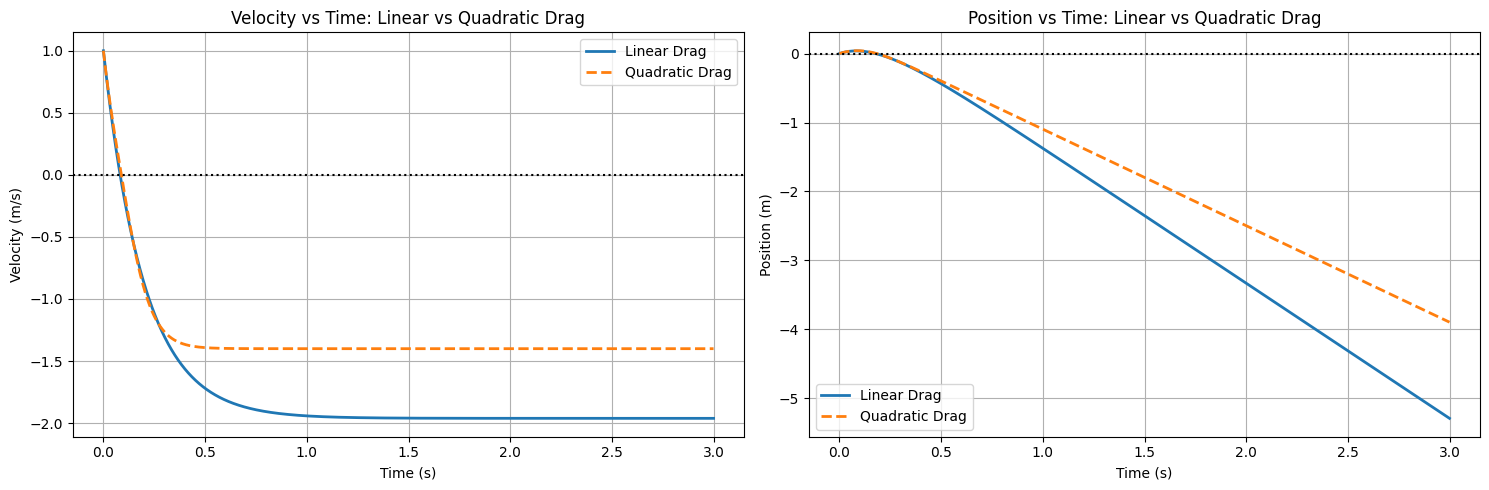

In [ ]:
# Part I - Solving with quadratic drag force (F = -cv²)
# Constants for quadratic drag
c = 0.5  # kg/m (quadratic drag coefficient)
dt = 0.001  # time step in seconds

def euler_method_quadratic_drag(time_array):
    """Solve for velocity with quadratic drag force F = -cv²"""
    v = np.zeros_like(time_array)
    v[0] = v0  # initial velocity
    
    for i in range(1, len(time_array)):
        # Calculate quadratic drag force
        velocity_squared = v[i-1] * abs(v[i-1])  # v^2 with proper sign
        current_drag = -c * velocity_squared
        
        # Update velocity using Euler's method
        total_acceleration = (gravity + current_drag) / m
        v[i] = v[i-1] + total_acceleration * dt
    
    return v

def euler_method_position_quadratic(total_time, v):
    """Calculate position using velocity from quadratic drag solution"""
    t = np.arange(0, total_time, dt)
    y = np.zeros_like(t)
    y[0] = y0
    
    for i in range(1, len(t)):
        y[i] = y[i-1] + v[i-1] * dt
    return y

# Calculate velocities and positions with quadratic drag
v_quadratic_drag = euler_method_quadratic_drag(time_arr)
y_quadratic_drag = euler_method_position_quadratic(simulation_time, v_quadratic_drag)

# Find maximum height time for quadratic drag
# Maximum height occurs when velocity is zero
velocity_zero_indices = np.where(np.diff(np.signbit(v_quadratic_drag)))[0]
if len(velocity_zero_indices) > 0:
    max_height_time_quad = time_arr[velocity_zero_indices[0]]
    max_height_quad = y_quadratic_drag[velocity_zero_indices[0]]
    print(f"Time to reach maximum height (quadratic drag): {max_height_time_quad:.2f} seconds")
    print(f"Maximum height reached: {max_height_quad:.2f} meters")

# Find time to hit ground with quadratic drag
zero_crossing_indices_quad = zero_cross(y_quadratic_drag)
if len(zero_crossing_indices_quad) > 1:
    time_to_hit_ground_quad = time_arr[zero_crossing_indices_quad[1]]
    downwards_time_quad = time_to_hit_ground_quad - max_height_time_quad
    print(f"\nTime to hit ground (quadratic drag): {time_to_hit_ground_quad:.2f} seconds")
    print(f"Time from max height to ground (quadratic drag): {downwards_time_quad:.2f} seconds")
    print("\nComparison of upward vs downward times (quadratic drag):")
    print(f"Upward time: {max_height_time_quad:.2f} seconds")
    print(f"Downward time: {downwards_time_quad:.2f} seconds")
    print("Conclusion: " + ("Downward motion takes longer" if downwards_time_quad > max_height_time_quad else "Upward motion takes longer"))

# Create a figure with two subplots side by side to compare linear vs quadratic drag
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot velocity comparison
ax1.plot(time_arr, v_euler_method_arr, label='Linear Drag', lw=2)
ax1.plot(time_arr, v_quadratic_drag, label='Quadratic Drag', lw=2, linestyle='--')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.set_title('Velocity vs Time: Linear vs Quadratic Drag')
ax1.legend()
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle=':')  

# Plot position comparison
ax2.plot(time_arr, y_euler_method_arr, label='Linear Drag', lw=2)
ax2.plot(time_arr, y_quadratic_drag, label='Quadratic Drag', lw=2, linestyle='--')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (m)')
ax2.set_title('Position vs Time: Linear vs Quadratic Drag')
ax2.legend()
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle=':')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()